In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
general = pd.read_csv('C:\\Users\\Admin\\Downloads\\HR-Machine-Learning-Data\\general_data.csv')

In [3]:
employee_survey = pd.read_csv('C:\\Users\\Admin\\Downloads\\HR-Machine-Learning-Data\\employee_survey_data.csv')

In [4]:
manager_survey = pd.read_csv('C:\\Users\\Admin\\Downloads\\HR-Machine-Learning-Data\\manager_survey_data.csv')

In [5]:
in_time = pd.read_csv('C:\\Users\\Admin\\Downloads\\HR-Machine-Learning-Data\\in_time.csv',index_col = 'Unnamed: 0').applymap(pd.Timestamp)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\2301377636.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  in_time = pd.read_csv('C:\\Users\\Admin\\Downloads\\HR-Machine-Learning-Data\\in_time.csv',index_col = 'Unnamed: 0').applymap(pd.Timestamp)


In [6]:
out_time = pd.read_csv('C:\\Users\\Admin\\Downloads\\HR-Machine-Learning-Data\\out_time.csv',index_col = 'Unnamed: 0').applymap(pd.Timestamp)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\3116481594.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  out_time = pd.read_csv('C:\\Users\\Admin\\Downloads\\HR-Machine-Learning-Data\\out_time.csv',index_col = 'Unnamed: 0').applymap(pd.Timestamp)


In [7]:
data_dictionary = pd.read_excel('C:\\Users\\Admin\\Downloads\\HR-Machine-Learning-Data\\data_dictionary.xlsx').fillna('')

In [8]:
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các dòng
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [9]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [10]:
employee_survey.head(10)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
5,6,3.0,2.0,2.0
6,7,1.0,3.0,1.0
7,8,1.0,2.0,3.0
8,9,2.0,4.0,3.0
9,10,2.0,1.0,3.0


In [11]:
employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [12]:
manager_survey.head(10)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
5,6,3,3
6,7,3,4
7,8,3,4
8,9,3,4
9,10,3,3


In [13]:
manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [14]:
data_dictionary

,Variable,Meaning,Levels
0,Age,Age of the employee,
1,Attrition,Whether the employee left in the previous year...,
2,BusinessTravel,How frequently the employees travelled for bus...,
3,Department,Department in company,
4,DistanceFromHome,Distance from home in kms,
5,Education,Education Level,1 'Below College'
6,,,2 'College'
7,,,3 'Bachelor'
8,,,4 'Master'
9,,,5 'Doctor'


In [15]:
in_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaT,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaT,2015-01-15 10:01:24,2015-01-16 10:19:08,NaT,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaT,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaT,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaT,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaT,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaT,2015-03-27 09:47:30,2015-03-30 10:

In [16]:
#Để chuyển dữ liệu từ hình trên sang kiểu datetime, xử lý từng cột của DataFrame chứa các giá trị ngày giờ đó bằng cách dùng vòng lặp for
for i in in_time.columns:
    in_time[i] = pd.to_datetime(in_time[i], errors='coerce')

In [17]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4410
Columns: 261 entries, 2015-01-01 to 2015-12-31
dtypes: datetime64[ns](261)
memory usage: 8.8 MB


In [18]:
out_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaT,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaT,2015-01-15 17:22:13,2015-01-16 17:35:11,NaT,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaT,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaT,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaT,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaT,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaT,2015-03-27 17:20:51,2015-03-30 17:

In [19]:
#dùng vòng lặp for để biến đổi kiểu dữ liệu datetime qua từng cột
for i in out_time.columns:
    out_time[i] = pd.to_datetime(out_time[i],errors='coerce')

In [20]:
out_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4410
Columns: 261 entries, 2015-01-01 to 2015-12-31
dtypes: datetime64[ns](261)
memory usage: 8.8 MB


In [21]:
work_hour = (out_time - in_time).fillna(pd.Timedelta(0))

In [22]:
work_hour = work_hour.applymap(lambda x: x.total_seconds() / 3600)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\3105680943.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  work_hour = work_hour.applymap(lambda x: x.total_seconds() / 3600)


In [23]:
work_hour.reset_index(inplace = True)
work_hour.rename(columns={'index': 'EmployeeID'},inplace=True)
work_hour.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,0.0,7.346944,7.267500,0.000000,6.775833,7.095000,7.050556,7.604722,0.0,7.629167,7.118889,7.413611,6.849722,6.901667,7.203056,7.605278,7.565278,7.470000,7.601389,7.267222,7.193056,7.435278,7.205278,7.605833,7.416111,7.839722,0.000000,7.832222,7.441111,7.225000,7.583611,7.200833,7.385833,7.156944,6.759722,7.744444,0.0,7.815000,7.408611,6.923056,7.161111,7.080000,7.310278,0.000000,6.915000,7.197778,7.847778,7.162500,7.616389,7.251944,7.445556,0.000000,7.555833,7.356944,7.865000,7.336944,7.658611,7.187778,7.040833,7.640000,7.427222,7.803056,7.115833,7.348056,7.146667,7.459722,7.756944,7.284722,7.695278,6.975556,7.525000,7.336389,7.562500,7.241944,7.889167,7.691667,7.508056,0.0,7.410556,7.308611,7.456667,7.062778,7.615000,0.000000,7.444722,7.502500,7.901667,6.816944,0.000000,7.333056,7.319444,7.465278,7.128889,7.573056,7.199722,7.877778,7.447778,0.000000,0.000000,7.717222,7.514167,7.041944,0.000000,7.072778,0.000000,7.075278,7.575000,7.421389,7.595278,7.542222,7.526111,7.521389,7.248889,7.178333,6.912778,7.112778,7.753611,7.05

In [24]:
#tính giờ trung bình làm việc của mỗi nhân viên
work_hour['Average_hour'] = work_hour.mean(axis=1)

In [25]:
work_hour_avg = work_hour[['EmployeeID', 'Average_hour']]

In [26]:
work_hour_avg.head()

,EmployeeID,Average_hour
0,1,6.533156
1,2,6.960598
2,3,6.489329
3,4,6.467612
4,5,7.505774


In [27]:
#Merge table employee, manager survey, average hour và general data thành 1 data final. JOIN bằng employeeid
master_data = general.merge(work_hour_avg, left_on = 'EmployeeID', right_on = 'EmployeeID')
master_data = master_data.merge(employee_survey, left_on = 'EmployeeID', right_on = 'EmployeeID')
master_data = master_data.merge(manager_survey, left_on = 'EmployeeID', right_on = 'EmployeeID')

In [28]:
master_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,6.533156,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,6.960598,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,6.489329,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,6.467612,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,7.505774,4.0,1.0,3.0,3,3


In [29]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [30]:
master_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Average_hour                0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [31]:
master_data.dropna(inplace = True)

In [32]:
master_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Average_hour               0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [33]:
master_data = master_data.drop(['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours'], axis = 1)

In [34]:
master_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,6.533156,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,6.960598,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,6.489329,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,6.467612,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,7.505774,4.0,1.0,3.0,3,3


In [35]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   Gender                   4300 non-null   object 
 8   JobLevel                 4300 non-null   int64  
 9   JobRole                  4300 non-null   object 
 10  MaritalStatus            4300 non-null   object 
 11  MonthlyIncome            4300 non-null   int64  
 12  NumCompaniesWorked       4300 non-null   float64
 13  PercentSalaryHike        4300 non-null   int64  
 14  StockOptionLevel         4300

In [36]:
master_data.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,2.913256,2.066977,65059.844186,2.690000,15.210698,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558,15.394936,2.723953,2.724884,2.761163,2.728837,3.153953
std,9.146517,8.097059,1.024774,1.106633,47045.398914,2.495764,3.662777,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831,5.006733,1.093802,1.101875,0.707800,0.710769,0.360946
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.394277,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.000000,29260.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,11.196935,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,2.000000,49360.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,15.439293,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83802.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000,19.626940,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,26.489678,4.000000,4.000000,4.000000,4.000000,4.000000


In [37]:
#Begin by understanding how many employees left and what percentage of all employees this figure represents.
# Get numbers of people who left vs. stayed
attrition_counts = master_data['Attrition'].value_counts()
attrition_counts

Attrition
No     3605
Yes     695
Name: count, dtype: int64

In [38]:
# Get percentages of people who left vs. stayed
attrition_percentage = master_data['Attrition'].value_counts(normalize=True) * 100
attrition_percentage

Attrition
No     83.837209
Yes    16.162791
Name: proportion, dtype: float64

In [39]:
# Tạo DataFrame để hiển thị rõ ràng
attrition_summary = pd.DataFrame({'Count': attrition_counts,'Percentage': attrition_percentage})
attrition_summary

,Count,Percentage
Attrition,,
No,3605,83.837209
Yes,695,16.162791


In [40]:
#Gender Analysis:
#tính giá trị trung bình của tuổi theo gender
avg_age = master_data.groupby('Gender')['Age'].mean().reset_index(name='avg')
avg_age

,Gender,avg
0,Female,37.373626
1,Male,36.626604


C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\1348996125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=attrition_summary.index, x='Count', data=attrition_summary, palette='viridis')


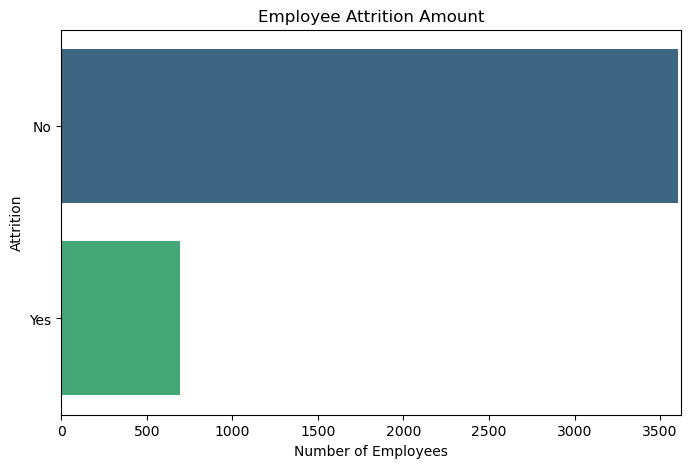

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(y=attrition_summary.index, x='Count', data=attrition_summary, palette='viridis')
plt.title('Employee Attrition Amount')
plt.ylabel('Attrition')  # Đổi nhãn trục y
plt.xlabel('Number of Employees')  # Đổi nhãn trục x
plt.xlim(0, attrition_summary['Count'].max() + 20)  # Cập nhật giới hạn cho trục x
plt.show()

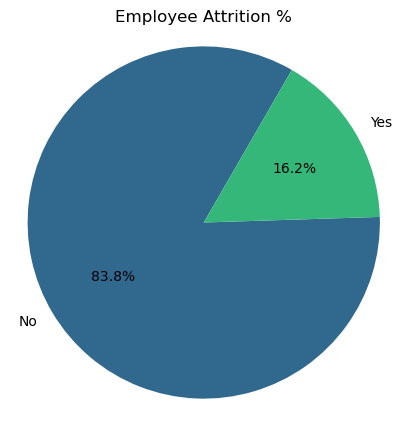

In [42]:
plt.figure(figsize=(5, 5))

# Sử dụng bảng màu viridis cho biểu đồ
colors = sns.color_palette('viridis', len(attrition_counts))  # Tạo danh sách màu từ bảng màu viridis
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=60, colors=colors)

plt.title('Employee Attrition %')
plt.axis('equal')  # Để đảm bảo biểu đồ là hình tròn
plt.show()

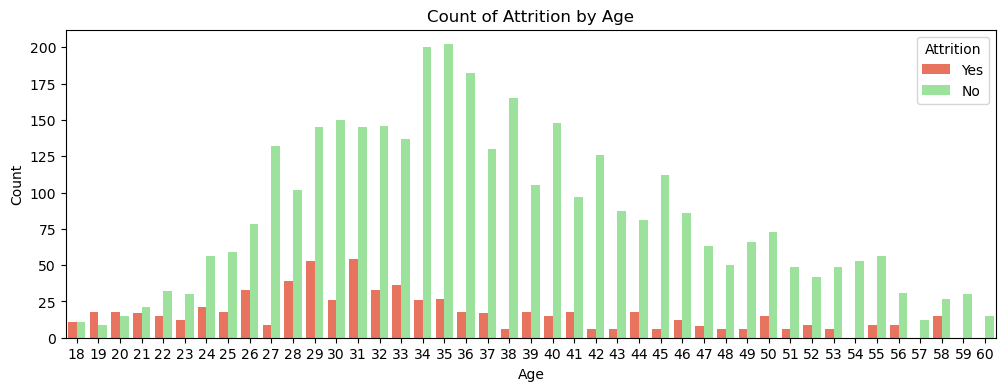

In [43]:
#Number of employee stay and left by age --> xu hướng giới trẻ chuyển chỗ làm việc không?
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=master_data, palette={"Yes": "tomato", "No": "lightgreen"})

plt.title('Count of Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

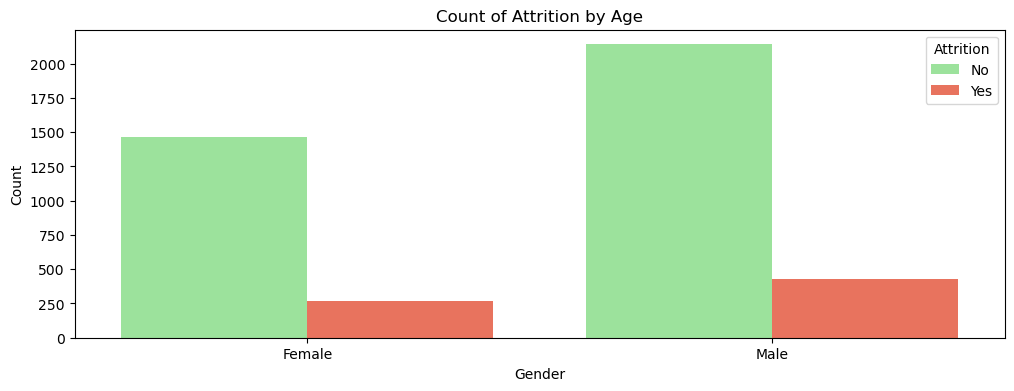

In [45]:
#Number of employee stay and left by age --> xu hướng giới trẻ chuyển chỗ làm việc không?
plt.subplots(figsize=(12,4))
sns.countplot(x='Gender', hue='Attrition', data=master_data, palette={"Yes": "tomato", "No": "lightgreen"})

plt.title('Count of Attrition by Age')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

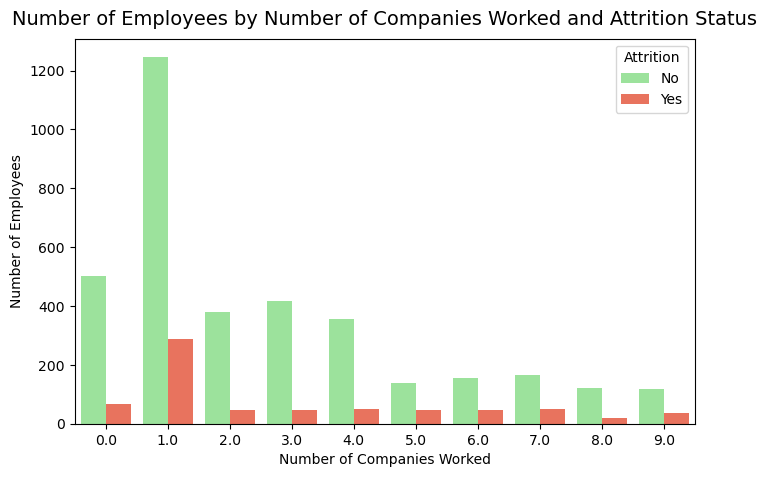

In [46]:
# Tính toán số lượng nhân viên theo số công ty đã làm việc và tình trạng nghỉ việc
num_companies_attrition = master_data.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='size')

# Tạo biểu đồ bar chart với seaborn
plt.figure(figsize=(8, 5))  # Điều chỉnh kích thước biểu đồ cho phù hợp
ax = sns.barplot(
    x='NumCompaniesWorked', y='size', hue='Attrition', data=num_companies_attrition, 
    palette={"Yes": "tomato", "No": "lightgreen"}, dodge=True
)

# Thiết lập tiêu đề và nhãn
plt.title('Number of Employees by Number of Companies Worked and Attrition Status', size=14, pad=10)
plt.xlabel('Number of Companies Worked')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)  # Giữ nhãn x theo chiều ngang

# Hiển thị biểu đồ
plt.show()

In [47]:
#print all of the data type and their unique value
for column in master_data.columns:
    if master_data[column].dtype == object:
        print(str(column) + ' : '+ str(master_data[column].unique()))
        print(master_data[column].value_counts())
        print('_______________________________________________________________________')

Attrition : ['No' 'Yes']
Attrition
No     3605
Yes     695
Name: count, dtype: int64
_______________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        3051
Travel_Frequently     809
Non-Travel            440
Name: count, dtype: int64
_______________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    2807
Sales                     1307
Human Resources            186
Name: count, dtype: int64
_______________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       1766
Medical             1364
Marketing            469
Technical Degree     384
Other                237
Human Resources       80
Name: count, dtype: int64
______________________

In [190]:
for column in master_data.columns:
    if master_data[column].dtype == np.number:
        continue
    master_data[column] = LabelEncoder().fit_transform(master_data[column])

C:\Users\Admin\AppData\Local\Temp\ipykernel_3192\116584483.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if master_data[column].dtype == np.number:
C:\Users\Admin\AppData\Local\Temp\ipykernel_3192\116584483.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if master_data[column].dtype == np.number:
C:\Users\Admin\AppData\Local\Temp\ipykernel_3192\116584483.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if master_data[column].dtype == np.number:
C:\Users\Admin\AppData\Local\Temp\ipykernel_3192\116584483.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if 

In [46]:
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các dòng
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
master_data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,6.533156,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,6.960598,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,6.489329,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,6.467612,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,7.505774,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,Married,40710,3.0,13,0,28.0,5,7,7,7,9.788835,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,Single,58130,2.0,20,1,5.0,2,0,0,0,6.157513,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,Male,2,Sales Executive,Married,31430,2.0,22,3,10.0,2,0,0,0,6.268419,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,Male,3,Laboratory Technician,Married,20440,0.0,21,0,10.0,2,9,7,8,6.387003,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,Female,4,Laboratory Technician,Divorced,134640,1.0,13,1,6.0,2,6,1,5,6.361605,2.0,1.0,3.0,3,3


<Figure size 800x600 with 0 Axes>

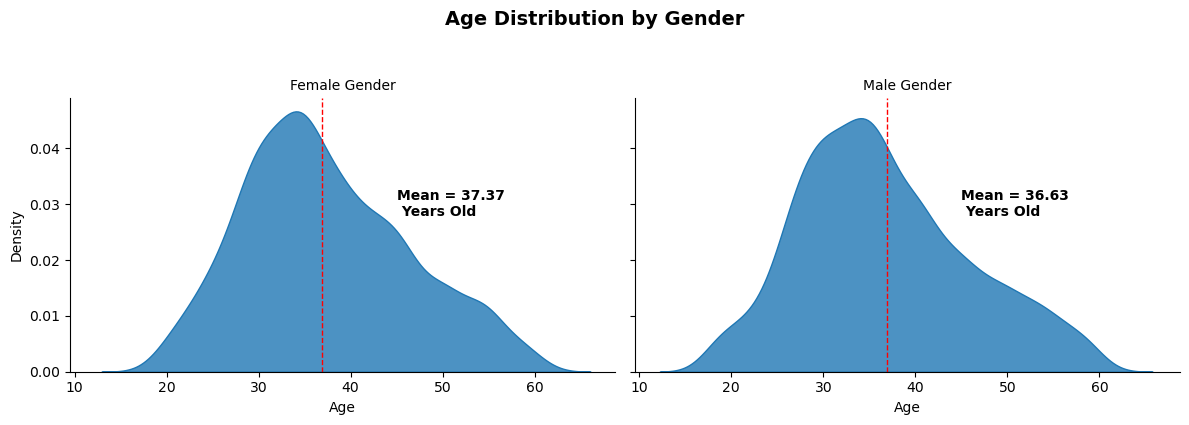

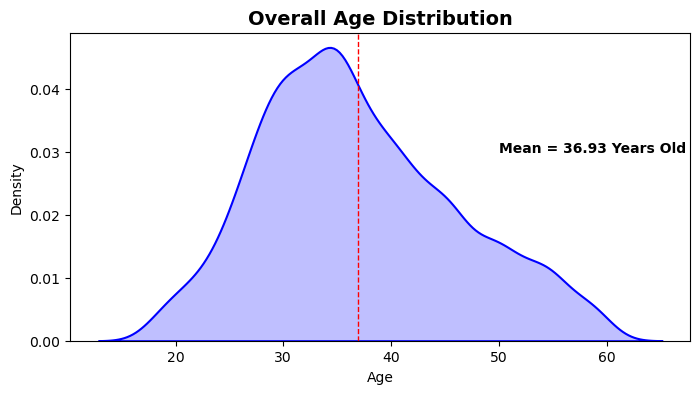

In [48]:
#Age Distribution by Gender. Xem thử sự phân bổ độ tuổi có ảnh hưởng gì không vì hiện tại xu hướng giới trẻ sẽ chuyển chỗ làm vc nhiều
# Bước 3: Vẽ phân phối tuổi theo giới tính
plt.figure(figsize=(8, 6))

g = sns.FacetGrid(master_data, col="Gender", height=4, aspect=1.5, sharex=True, sharey=True)
g.map(sns.kdeplot, 'Age', fill=True, alpha=0.8)
g.map(plt.axvline, x=master_data['Age'].mean(), color='red', linestyle='--', linewidth=1)
#Thêm chú thích văn bản vào biểu đồ
for ax, gender in zip(g.axes.flat, ['Female', 'Male']):
    avg_age = master_data[master_data['Gender'] == gender]['Age'].mean()
    ax.text(45, 0.03, f"Mean = {avg_age:.2f} \n Years Old", 
            ha='left', va='center', color='black', fontsize=10, fontweight='bold')

g.set_titles("{col_name} Gender")
g.set_axis_labels("Age", "Density")
g.fig.suptitle('Age Distribution by Gender', y=1.05, fontsize=14, fontweight='bold')
g.tight_layout()

# Bước 4: Phân phối tuổi tổng quan
plt.figure(figsize=(8, 4))

overall_mean_age = master_data['Age'].mean()

# Vẽ phân phối tổng quan
sns.kdeplot(master_data['Age'], fill=True, color="blue", linewidth=1.5)
plt.axvline(overall_mean_age, color='red', linestyle='--', linewidth=1)
plt.title('Overall Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Density')

# Thêm chú thích cho giá trị trung bình
plt.text(50, 0.03, f"Mean = {overall_mean_age:.2f} Years Old", color='black', fontsize=10, fontweight='bold')

plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

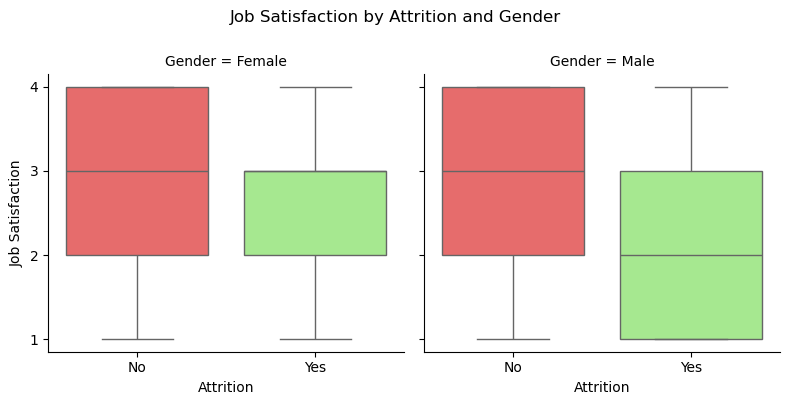

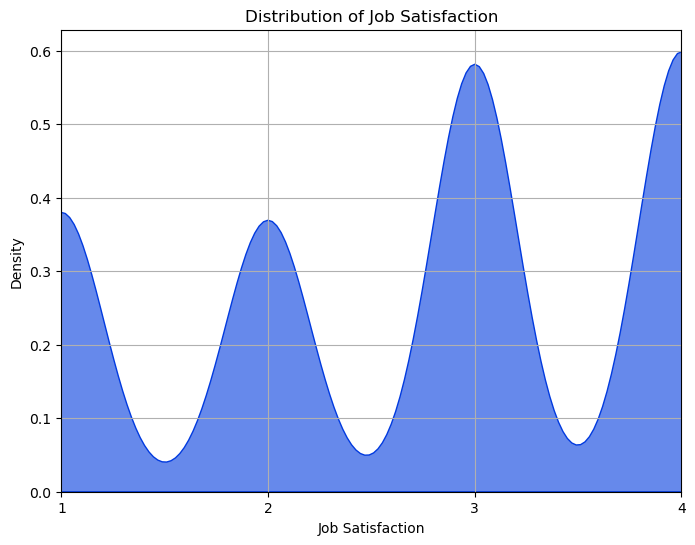

In [49]:
#Distribution of Job Satisfaction:
# Tùy chỉnh kích thước hình ảnh
plt.figure(figsize=(8, 6))

# Biểu đồ hộp (boxplot) theo Attrition và JobSatisfaction
plt.figure(figsize=(8, 6))
g = sns.catplot(
    x='Attrition', y='JobSatisfaction', hue='Attrition', col='Gender',
    kind='box', data=master_data, palette=['#FA5858', '#9FF781'], height=4, aspect=1
)
g.set_axis_labels("Attrition", "Job Satisfaction")
g.set(yticks=[1, 2, 3, 4])  # Đặt các ticks cho trục y chỉ có giá trị nguyên
g.fig.suptitle('Job Satisfaction by Attrition and Gender', y=1)
g.tight_layout()

# Biểu đồ phân phối mức độ hài lòng công việc (Job Satisfaction)
plt.figure(figsize=(8, 6))
sns.kdeplot(master_data['JobSatisfaction'], color="#013ADF", fill=True, alpha=0.6)
plt.xlim(1, 4)  # Giới hạn x từ 1 đến 4
plt.xticks([1, 2, 3, 4])
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [50]:
#Monthly Income by Gender
#tính lương trung bình theo gender
mean_income = master_data.groupby('Gender')['MonthlyIncome'].mean().reset_index()
mean_income

,Gender,MonthlyIncome
0,Female,64707.356854
1,Male,65296.892260


C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\978418144.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x='MonthlyIncome', y='Attrition', data=mean_income_attrition, palette={"Yes": "tomato", "No": "lightgreen"})


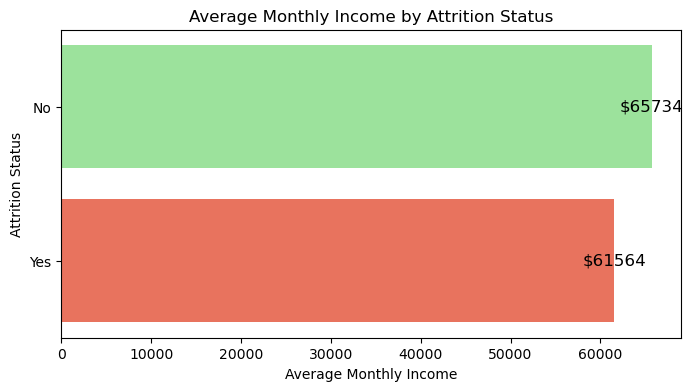

In [51]:
# Tính thu nhập trung bình giữa những người nghỉ việc và không nghỉ việc
mean_income_attrition = master_data.groupby('Attrition')['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=(8, 4))

# Hoán đổi x và y để tạo biểu đồ cột ngang
p = sns.barplot(x='MonthlyIncome', y='Attrition', data=mean_income_attrition, palette={"Yes": "tomato", "No": "lightgreen"})

# Hiển thị giá trị lương trên cột
for i, bar in enumerate(p.patches):
    p.text(
        bar.get_width() - 0.5,  # Đặt giá trị bên phải cột
        bar.get_y() + bar.get_height() / 2, 
        f'${bar.get_width():.0f}', 
        ha='center', va='center', fontsize=12, color='black'
    )

# Thêm tiêu đề và nhãn trục
plt.title("Average Monthly Income by Attrition Status")
plt.xlabel('Average Monthly Income')
plt.ylabel('Attrition Status')

plt.show()

In [52]:
# Sử dụng biến Attrition dưới dạng nhị phân (Yes = 1, No = 0) để kiểm tra mối tương quan
master_data['Attrition_Binary'] = master_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Kiểm tra mối tương quan giữa MonthlyIncome và Attrition_Binary
correlation = master_data['MonthlyIncome'].corr(master_data['Attrition_Binary'])
print(f"Hệ số tương quan giữa Monthly Income và Attrition: {correlation:.2f}")

Hệ số tương quan giữa Monthly Income và Attrition: -0.03


In [52]:
#Giá trị của hệ số tương quan dao động từ -1 đến 1:

#1: Mối tương quan hoàn toàn dương (khi một biến tăng, biến kia cũng tăng).
#-1: Mối tương quan hoàn toàn âm (khi một biến tăng, biến kia giảm).
#0: Không có mối tương quan (các biến không liên quan với nhau).
#Hệ số -0.03 chỉ ra mối tương quan âm rất nhỏ giữa thu nhập hàng tháng và nghỉ việc:

#Mối tương quan âm nghĩa là khi thu nhập tăng, tỷ lệ nghỉ việc có xu hướng giảm, 
#nhưng trong trường hợp này, hệ số -0.03 rất gần với 0, cho thấy sự ảnh hưởng của thu nhập đến việc nghỉ việc là rất yếu 
#hoặc không có sự ảnh hưởng đáng kể.

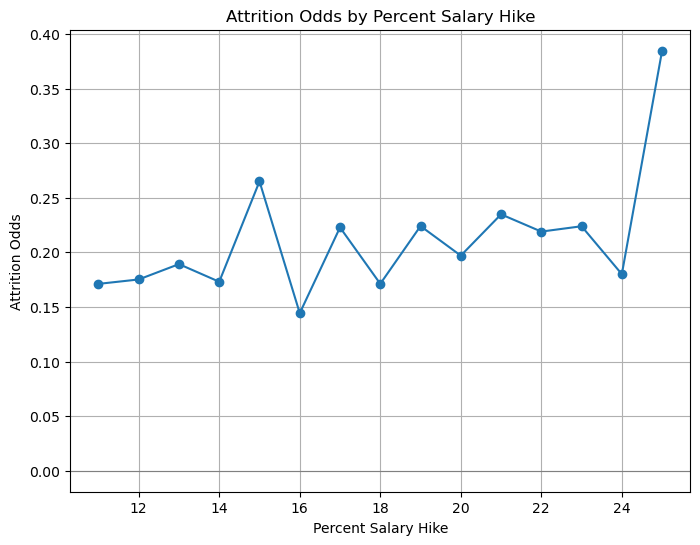

In [53]:
# Tạo ma trận chéo
PercentSalaryHike = pd.crosstab(master_data.PercentSalaryHike, master_data.Attrition, normalize=True)
PercentSalaryHike = PercentSalaryHike['Yes'] / PercentSalaryHike['No']
# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(PercentSalaryHike.index, PercentSalaryHike, marker='o', linestyle='-')

# Cài đặt tiêu đề và nhãn
plt.title('Attrition Odds by Percent Salary Hike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Attrition Odds')

# Tùy chỉnh trục y
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.8)  # Thêm đường ngang tại y=0

# Hiển thị biểu đồ
plt.show()

In [54]:
#0.4 tức là 40% khả năng nghỉ việc, và 60% khả năng ở lại, công ty tăng 24% --> làm tốt

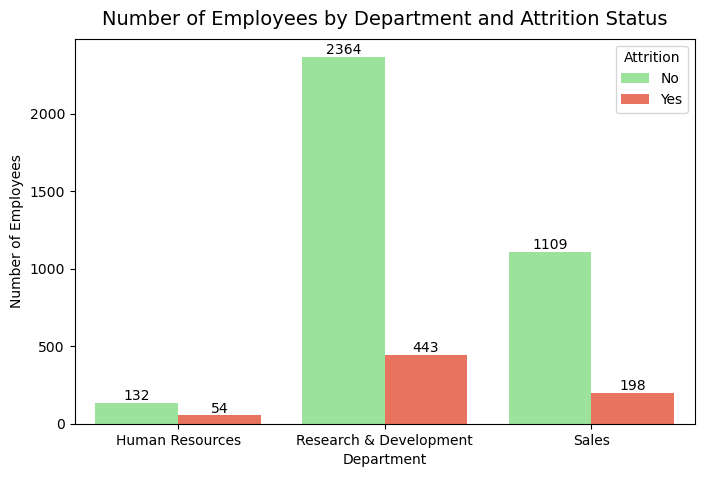

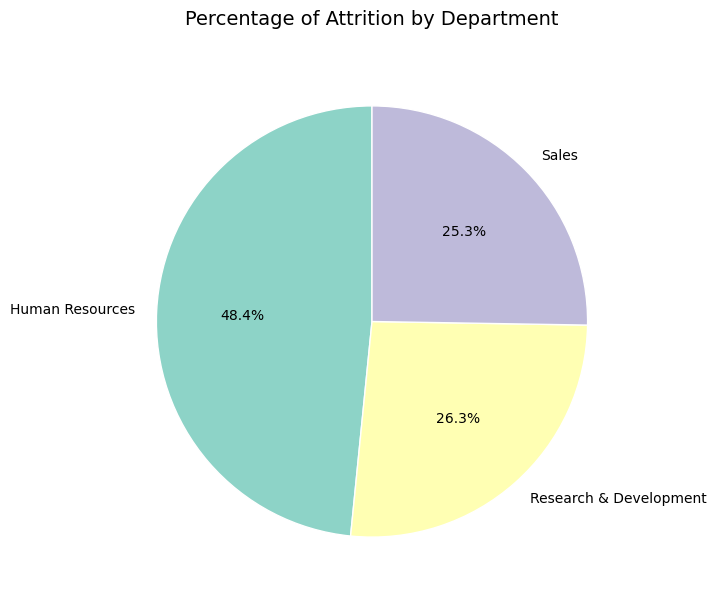

In [55]:
# Tính toán số lượng nhân viên nghỉ và tiếp tục làm việc theo phòng ban
department_attrition = master_data.groupby(['Department', 'Attrition']).size().reset_index(name='size')

# Tạo biểu đồ bar chart với seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Department', y='size', hue='Attrition', data=department_attrition, 
    palette={"Yes": "tomato", "No": "lightgreen"}, dodge=True
)

# Hiển thị số lượng nhân viên trên từng thanh
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Thiết lập tiêu đề và nhãn
plt.title('Number of Employees by Department and Attrition Status', size=14, pad=10)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)

# Hiển thị biểu đồ
plt.show()

# Tính toán phần trăm nhân viên nghỉ việc theo từng phòng ban
attrition_pct = department_attrition.pivot(index='Department', columns='Attrition', values='size').fillna(0)
attrition_pct['Total'] = attrition_pct['Yes'] + attrition_pct['No']
attrition_pct['Attrition %'] = (attrition_pct['Yes'] / attrition_pct['Total']) * 100

# Tạo biểu đồ hình tròn dựa trên tỷ lệ nghỉ việc
plt.figure(figsize=(7, 7))
plt.pie(
    attrition_pct['Attrition %'], labels=attrition_pct.index, autopct='%1.1f%%',
    colors=sns.color_palette("Set3", len(attrition_pct)), startangle=90, wedgeprops={'edgecolor': 'white'}
)

# Thiết lập tiêu đề
plt.title('Percentage of Attrition by Department', size=14, pad=20)
plt.show()

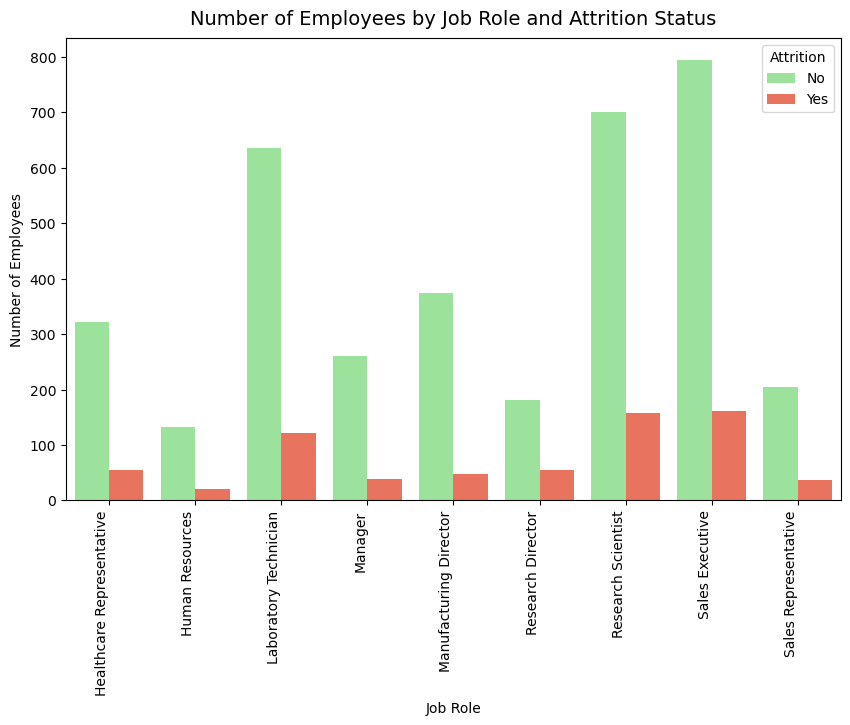

In [56]:
# Tính toán số lượng nhân viên nghỉ và tiếp tục làm việc theo vai trò công việc
job_role_attrition = master_data.groupby(['JobRole', 'Attrition']).size().reset_index(name='size')

# Tạo biểu đồ bar chart với seaborn
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ cho phù hợp với số lượng JobRole
ax = sns.barplot(
    x='JobRole', y='size', hue='Attrition', data=job_role_attrition, 
    palette={"Yes": "tomato", "No": "lightgreen"}, dodge=True
)

# Thiết lập tiêu đề và nhãn
plt.title('Number of Employees by Job Role and Attrition Status', size=14, pad=10)
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90, ha='right')  # Xoay nhãn x để tránh bị chồng lấn

# Hiển thị biểu đồ
plt.show()

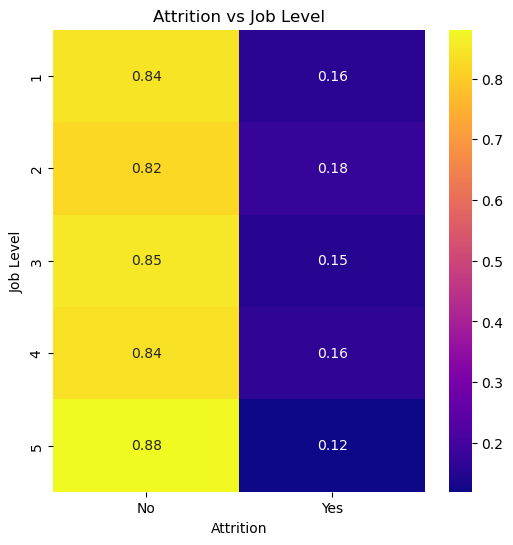

In [57]:
# Tạo ma trận chéo cho JobLevel và Attrition
job_level_attrition = pd.crosstab(master_data.JobLevel, master_data.Attrition, normalize='index')

# Vẽ heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(job_level_attrition, annot=True, fmt='.2f', cmap='plasma', cbar=True)

# Cài đặt tiêu đề và nhãn
plt.title('Attrition vs Job Level')
plt.xlabel('Attrition')
plt.ylabel('Job Level')

# Hiển thị biểu đồ
plt.show()

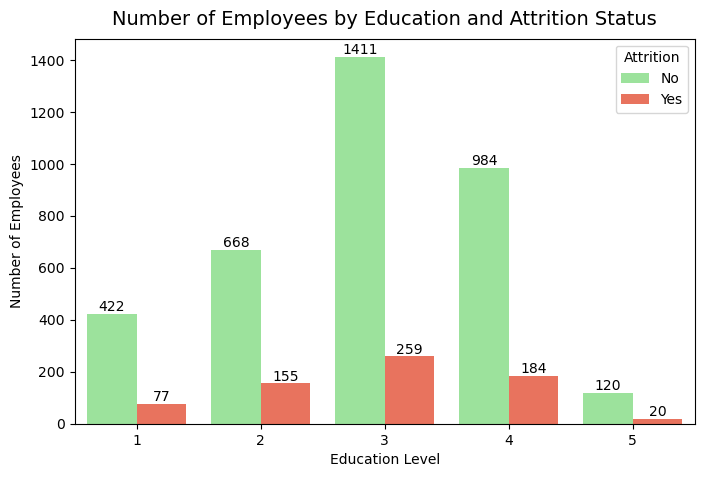

In [58]:
# Tính toán số lượng nhân viên theo mức độ giáo dục và tình trạng nghỉ việc
education_attrition = master_data.groupby(['Education', 'Attrition']).size().reset_index(name='size')

# Tạo biểu đồ bar chart với seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Education', y='size', hue='Attrition', data=education_attrition, 
    palette={"Yes": "tomato", "No": "lightgreen"}, dodge=True
)

# Hiển thị số lượng nhân viên trên từng thanh
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Thiết lập tiêu đề và nhãn
plt.title('Number of Employees by Education and Attrition Status', size=14, pad=10)
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)

# Hiển thị biểu đồ
plt.show()

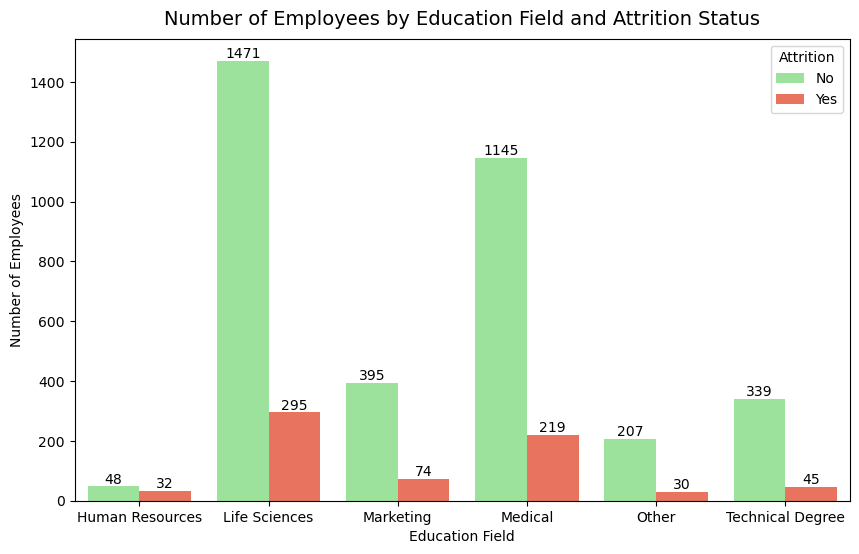

In [59]:
# Tính toán số lượng nhân viên theo lĩnh vực giáo dục và tình trạng nghỉ việc
education_field_attrition = master_data.groupby(['EducationField', 'Attrition']).size().reset_index(name='size')

# Tạo biểu đồ bar chart với seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='EducationField', y='size', hue='Attrition', data=education_field_attrition, 
    palette={"Yes": "tomato", "No": "lightgreen"}, dodge=True
)

# Hiển thị số lượng nhân viên trên từng thanh
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Thiết lập tiêu đề và nhãn
plt.title('Number of Employees by Education Field and Attrition Status', size=14, pad=10)
plt.xlabel('Education Field')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)

# Hiển thị biểu đồ
plt.show()

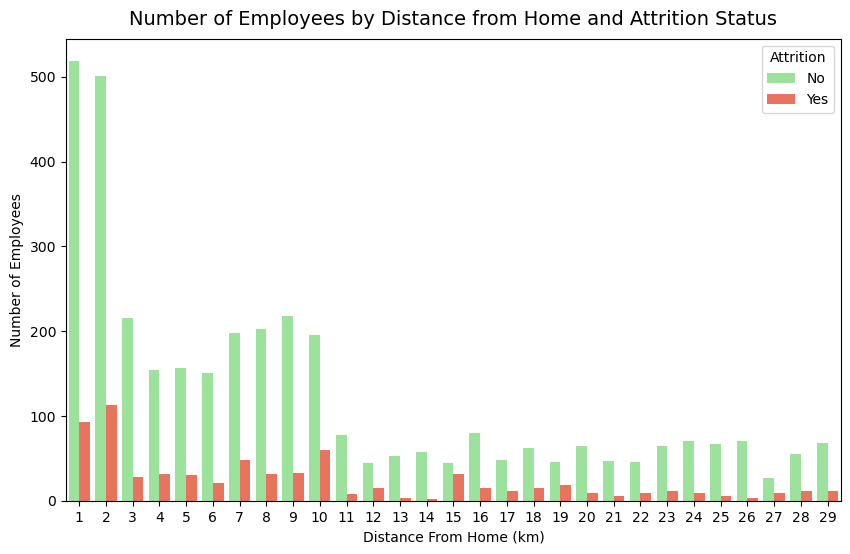

In [60]:
# Tính toán số lượng nhân viên theo khoảng cách từ nhà và tình trạng nghỉ việc
distance_attrition = master_data.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='size')

# Tạo biểu đồ bar chart với seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='DistanceFromHome', y='size', hue='Attrition', data=distance_attrition, 
    palette={"Yes": "tomato", "No": "lightgreen"}, dodge=True
)

# Thiết lập tiêu đề và nhãn
plt.title('Number of Employees by Distance from Home and Attrition Status', size=14, pad=10)
plt.xlabel('Distance From Home (km)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)

# Hiển thị biểu đồ
plt.show()

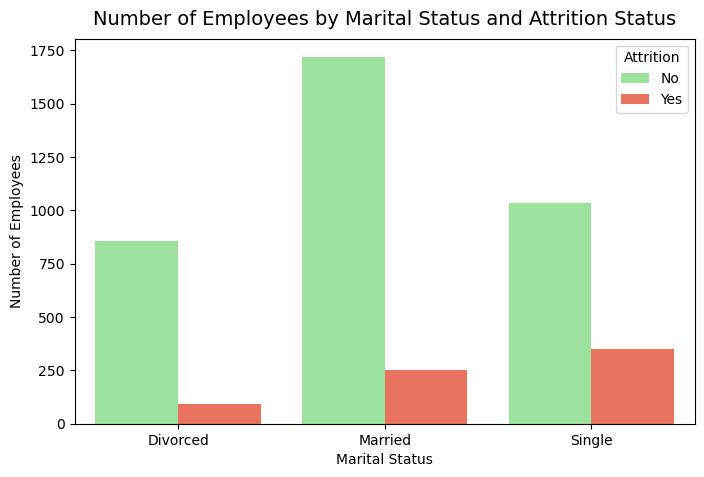

In [61]:
# Tính toán số lượng nhân viên theo tình trạng hôn nhân và tình trạng nghỉ việc
marital_status_attrition = master_data.groupby(['MaritalStatus', 'Attrition']).size().reset_index(name='size')

# Tạo biểu đồ bar chart với seaborn
plt.figure(figsize=(8, 5))  # Điều chỉnh kích thước biểu đồ cho phù hợp
ax = sns.barplot(
    x='MaritalStatus', y='size', hue='Attrition', data=marital_status_attrition, 
    palette={"Yes": "tomato", "No": "lightgreen"}, dodge=True
)

# Thiết lập tiêu đề và nhãn
plt.title('Number of Employees by Marital Status and Attrition Status', size=14, pad=10)
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)  # Giữ nhãn x theo chiều ngang

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\3856482368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition', y='Average_hour', data=mean_hours_per_week, palette={"Yes": "tomato", "No": "lightgreen"})


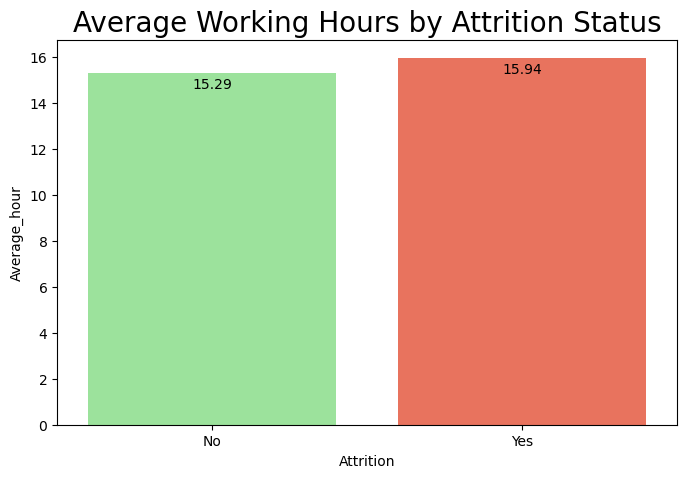

In [62]:
# Tính trung bình số giờ làm việc mỗi tuần theo tình trạng nghỉ việc
mean_hours_per_week = master_data.groupby('Attrition')['Average_hour'].mean().reset_index()

# Tạo biểu đồ cột để so sánh
plt.figure(figsize=(8, 5))
sns.barplot(x='Attrition', y='Average_hour', data=mean_hours_per_week, palette={"Yes": "tomato", "No": "lightgreen"})

# Hiển thị số liệu trên các thanh
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() - 0.5, 
        f'{bar.get_height():.2f}', 
        ha='center', va='center', fontsize=10, color='black'
    )

# Thiết lập tiêu đề và nhãn
plt.title("Average Working Hours by Attrition Status", size=20)
plt.xlabel('Attrition')
plt.ylabel('Average_hour')

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\2976061729.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition', y='YearsSinceLastPromotion', data=mean_years_since_last_promotion, palette={"Yes": "tomato", "No": "lightgreen"})


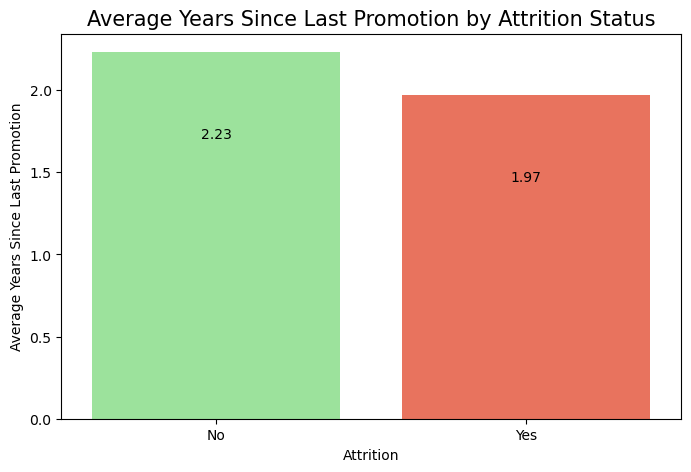

In [63]:
# Tính trung bình số năm kể từ lần thăng chức gần nhất theo tình trạng nghỉ việc
mean_years_since_last_promotion = master_data.groupby('Attrition')['YearsSinceLastPromotion'].mean().reset_index()

# Tạo biểu đồ cột để so sánh
plt.figure(figsize=(8, 5))
sns.barplot(x='Attrition', y='YearsSinceLastPromotion', data=mean_years_since_last_promotion, palette={"Yes": "tomato", "No": "lightgreen"})

# Hiển thị số liệu trên các thanh
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() - 0.5, 
        f'{bar.get_height():.2f}', 
        ha='center', va='center', fontsize=10, color='black'
    )

# Thiết lập tiêu đề và nhãn
plt.title("Average Years Since Last Promotion by Attrition Status", size=15)
plt.xlabel('Attrition')
plt.ylabel('Average Years Since Last Promotion')

# Hiển thị biểu đồ
plt.show()

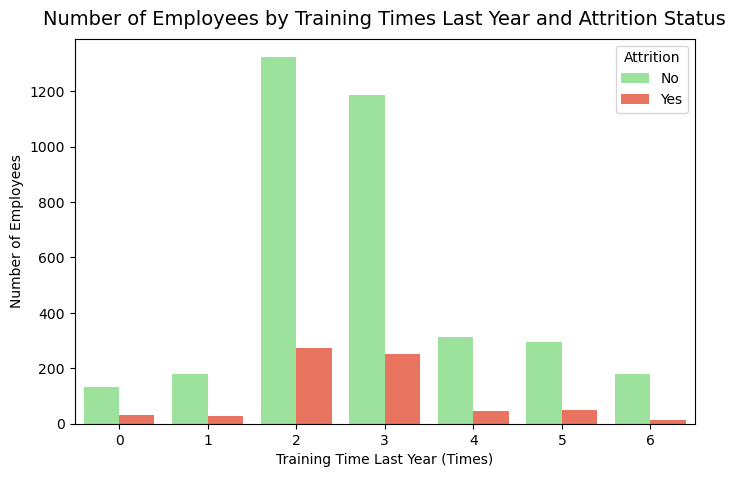

In [64]:
# Tính toán số lượng nhân viên theo thời gian đào tạo và tình trạng nghỉ việc
training_time_attrition = master_data.groupby(['TrainingTimesLastYear', 'Attrition']).size().reset_index(name='size')

# Tạo biểu đồ bar chart với seaborn
plt.figure(figsize=(8, 5))  # Điều chỉnh kích thước biểu đồ cho phù hợp
ax = sns.barplot(
    x='TrainingTimesLastYear', y='size', hue='Attrition', data=training_time_attrition, 
    palette={"Yes": "tomato", "No": "lightgreen"}, dodge=True
)

# Thiết lập tiêu đề và nhãn
plt.title('Number of Employees by Training Times Last Year and Attrition Status', size=14, pad=10)
plt.xlabel('Training Time Last Year (Times)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)  # Giữ nhãn x theo chiều ngang

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\1248481942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attritions['WorkLifeBalance'] = attritions['WorkLifeBalance'].astype('category')
C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\1248481942.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_department = attritions.groupby(['Department', 'WorkLifeBalance']).size().reset_index(name='count')


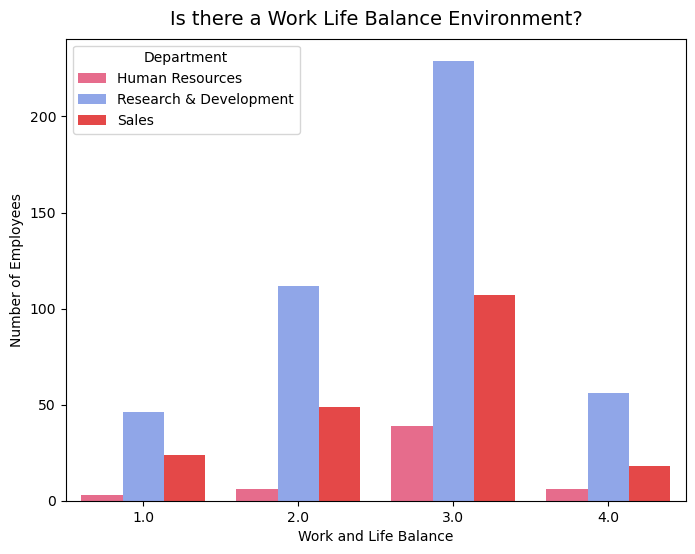

In [65]:
attritions = master_data[master_data['Attrition'] == 'Yes']

# Đổi WorkLifeBalance thành kiểu dữ liệu dạng factor (categorical)
attritions['WorkLifeBalance'] = attritions['WorkLifeBalance'].astype('category')

# Tính số lượng theo Department và WorkLifeBalance
by_department = attritions.groupby(['Department', 'WorkLifeBalance']).size().reset_index(name='count')

# Tạo biểu đồ cột với seaborn
plt.figure(figsize=(8, 6))  # Kích thước biểu đồ lớn hơn để dễ nhìn
p = sns.barplot(
    data=by_department,
    x='WorkLifeBalance',
    y='count',
    hue='Department',
    palette=["#FA5882", "#819FF7", "#FE2E2E"],
    dodge=True  # Đảm bảo các cột không chồng chéo
)

# Thiết lập tiêu đề và nhãn
plt.title("Is there a Work Life Balance Environment?", fontsize=14, pad=10)
plt.xlabel("Work and Life Balance")
plt.ylabel("Number of Employees")

plt.show()

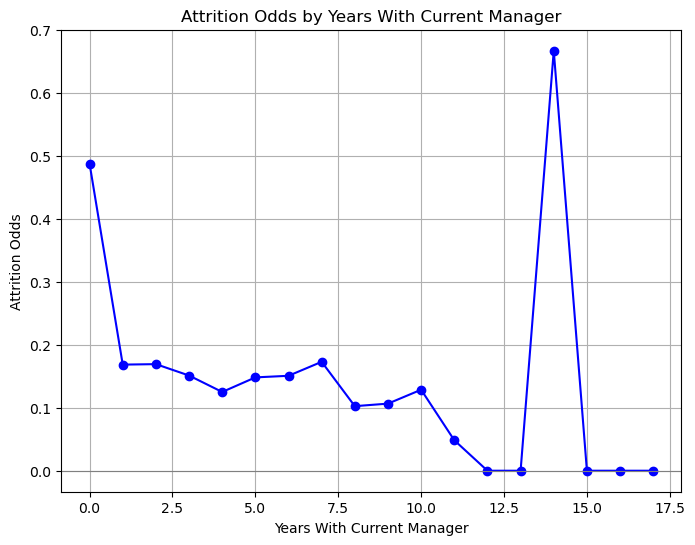

In [66]:
# Tạo ma trận chéo giữa 'YearsWithCurrManager' và 'Attrition'
YearsWithCurrManager = pd.crosstab(master_data.YearsWithCurrManager, master_data.Attrition, normalize=True)

# Tính tỷ lệ odds (Attrition odds)
YearsWithCurrManager = YearsWithCurrManager['Yes'] / YearsWithCurrManager['No']

# Vẽ biểu đồ bằng matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Kích thước biểu đồ
plt.plot(YearsWithCurrManager.index, YearsWithCurrManager, marker='o', linestyle='-', color='b')  # Đường và điểm

# Cài đặt tiêu đề và nhãn trục
plt.title('Attrition Odds by Years With Current Manager')
plt.xlabel('Years With Current Manager')
plt.ylabel('Attrition Odds')

# Tùy chỉnh trục y và grid
plt.grid(True)  # Ẩn lưới
plt.axhline(0, color='gray', linewidth=0.8)  # Đường ngang tại y=0

# Hiển thị biểu đồ
plt.show()

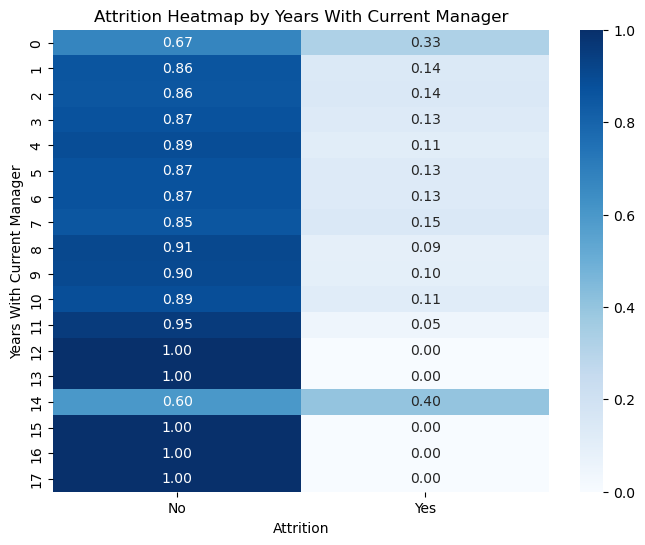

In [67]:
# Tạo ma trận chéo giữa 'YearsWithCurrManager' và 'Attrition'
YearsWithCurrManager = pd.crosstab(master_data.YearsWithCurrManager, master_data.Attrition, normalize='index')

# Vẽ heatmap bằng seaborn
plt.figure(figsize=(8, 6))  # Kích thước biểu đồ
sns.heatmap(YearsWithCurrManager, annot=True, cmap='Blues', cbar=True, fmt='.2f')

# Cài đặt tiêu đề và nhãn trục
plt.title('Attrition Heatmap by Years With Current Manager')
plt.xlabel('Attrition')
plt.ylabel('Years With Current Manager')

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


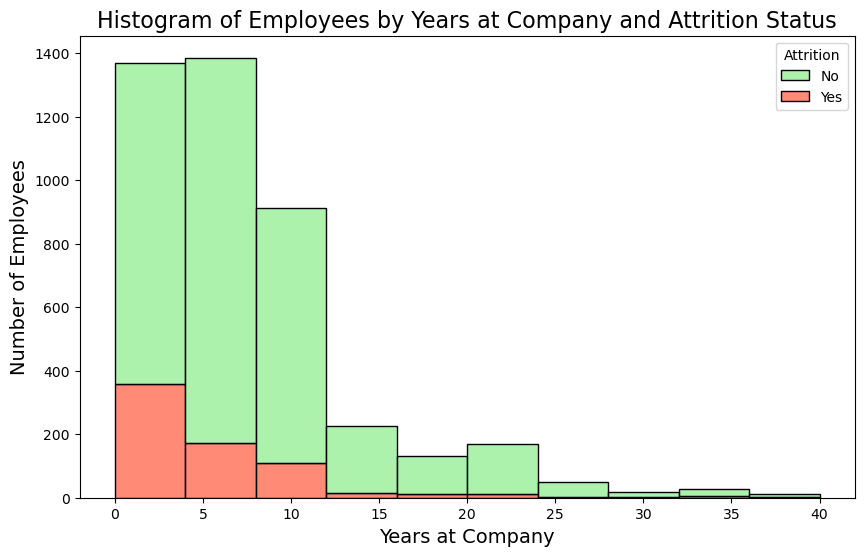

In [68]:
# Tạo DataFrame chứa số lượng nhân viên theo 'YearsAtCompany' và 'Attrition'
years_at_company_attrition = master_data.groupby(['YearsAtCompany', 'Attrition']).size().reset_index(name='size')

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
sns.histplot(data=years_at_company_attrition, x='YearsAtCompany', hue='Attrition', weights='size', multiple='stack', palette={"Yes": "tomato", "No": "lightgreen"})

# Cài đặt tiêu đề và nhãn trục
plt.title('Histogram of Employees by Years at Company and Attrition Status', fontsize=16)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


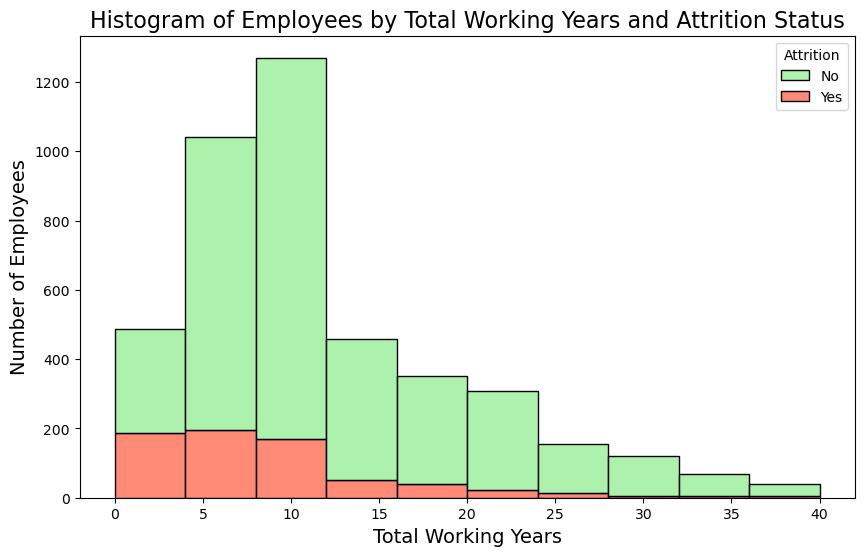

In [69]:
# Tạo DataFrame chứa số lượng nhân viên theo 'TotalWorkingYears' và 'Attrition'
total_working_years_attrition = master_data.groupby(['TotalWorkingYears', 'Attrition']).size().reset_index(name='size')

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
sns.histplot(data=total_working_years_attrition, x='TotalWorkingYears', hue='Attrition', weights='size', multiple='stack', palette={"Yes": "tomato", "No": "lightgreen"})

# Cài đặt tiêu đề và nhãn trục
plt.title('Histogram of Employees by Total Working Years and Attrition Status', fontsize=16)
plt.xlabel('Total Working Years', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Hiển thị biểu đồ
plt.show()

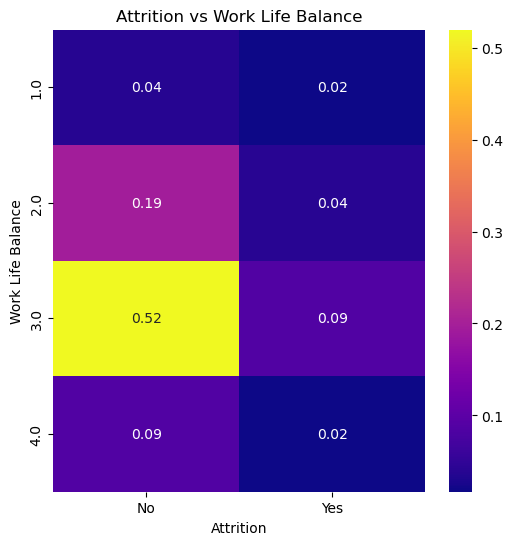

In [70]:
# Tạo ma trận chéo
WorkLifeBalance = pd.crosstab(master_data.WorkLifeBalance, master_data.Attrition, normalize=True)

# Vẽ heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(WorkLifeBalance, annot=True, fmt='.2f', cmap='plasma', cbar=True)

# Cài đặt tiêu đề và nhãn
plt.title('Attrition vs Work Life Balance')
plt.xlabel('Attrition')
plt.ylabel('Work Life Balance')

# Hiển thị biểu đồ
plt.show()

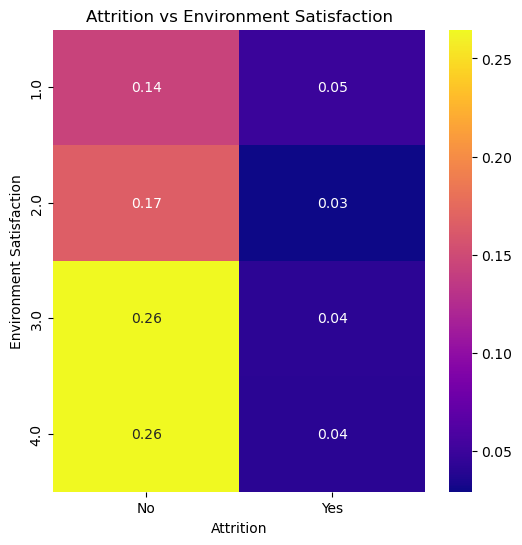

In [71]:
# Attrition vs Environment Satisfaction
# Tạo ma trận chéo
EnvironmentSatisfaction = pd.crosstab(master_data.EnvironmentSatisfaction, master_data.Attrition, normalize=True)

# Vẽ heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(EnvironmentSatisfaction, annot=True, fmt='.2f', cmap='plasma', cbar=True)

# Cài đặt tiêu đề và nhãn
plt.title('Attrition vs Environment Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Environment Satisfaction')

# Hiển thị biểu đồ
plt.show()

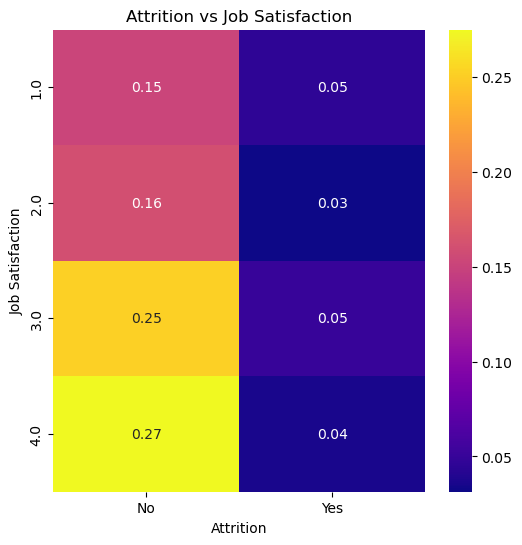

In [72]:
# Attrition vs Job Satisfaction
# Tạo ma trận chéo
JobSatisfaction = pd.crosstab(master_data.JobSatisfaction, master_data.Attrition, normalize=True)

# Vẽ heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(JobSatisfaction, annot=True, fmt='.2f', cmap='plasma', cbar=True)

# Cài đặt tiêu đề và nhãn
plt.title('Attrition vs Job Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')

# Hiển thị biểu đồ
plt.show()

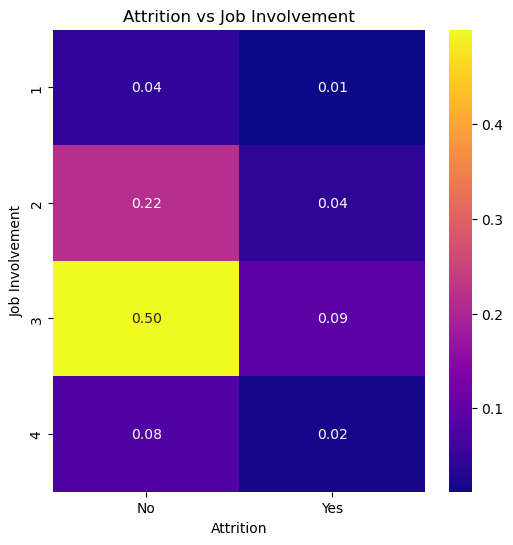

In [73]:
# Attrition vs Job Involvement
# Tạo ma trận chéo
JobInvolvement = pd.crosstab(master_data.JobInvolvement, master_data.Attrition, normalize=True)

# Vẽ heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(JobInvolvement, annot=True, fmt='.2f', cmap='plasma', cbar=True)

# Cài đặt tiêu đề và nhãn
plt.title('Attrition vs Job Involvement')
plt.xlabel('Attrition')
plt.ylabel('Job Involvement')

# Hiển thị biểu đồ
plt.show()

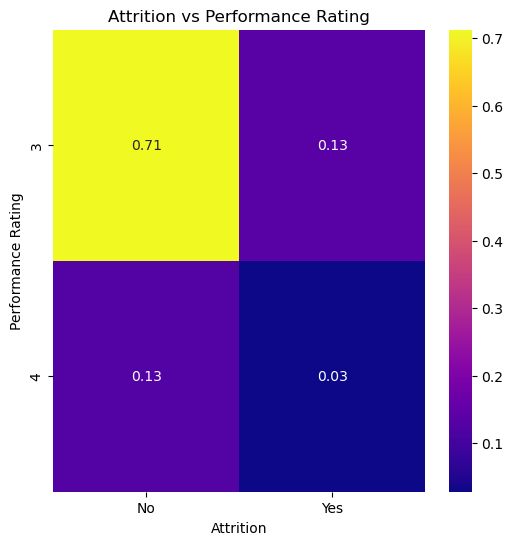

In [74]:
#attrition vs Performance rating
# Tạo ma trận chéo
PerformanceRating = pd.crosstab(master_data.PerformanceRating, master_data.Attrition, normalize=True)

# Vẽ heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(PerformanceRating, annot=True, fmt='.2f', cmap='plasma', cbar=True)

# Cài đặt tiêu đề và nhãn
plt.title('Attrition vs Performance Rating')
plt.xlabel('Attrition')
plt.ylabel('Performance Rating')

# Hiển thị biểu đồ
plt.show()

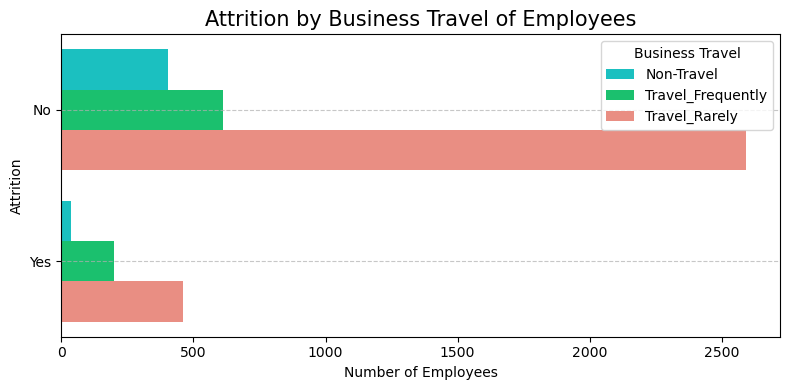

In [75]:
# Tính số lượng nhân viên theo Attrition và BusinessTravel
work_bal_cnt = master_data.groupby(['Attrition', 'BusinessTravel']).size().reset_index(name='count')

# Vẽ biểu đồ cột số lượng nhân viên theo Attrition và BusinessTravel
plt.figure(figsize=(8, 4))
sns.barplot(x='count', y='Attrition', hue='BusinessTravel', data=work_bal_cnt, palette=["#00dbdb", "#00db6e", "#fa8072"])

# Thiết lập tiêu đề và nhãn cho biểu đồ
plt.title("Attrition by Business Travel of Employees", fontsize=15)
plt.ylabel("Attrition")
plt.xlabel("Number of Employees")

# Thêm chú thích (legend)
plt.legend(title="Business Travel", loc="upper right")

# Hiển thị lưới biểu đồ
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\1605607713.py:6: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='count', y='Attrition', hue='StockOptionLevel', data=work_bal_cnt, palette=["#00dbdb", "#00db6e", "#fa8072"])


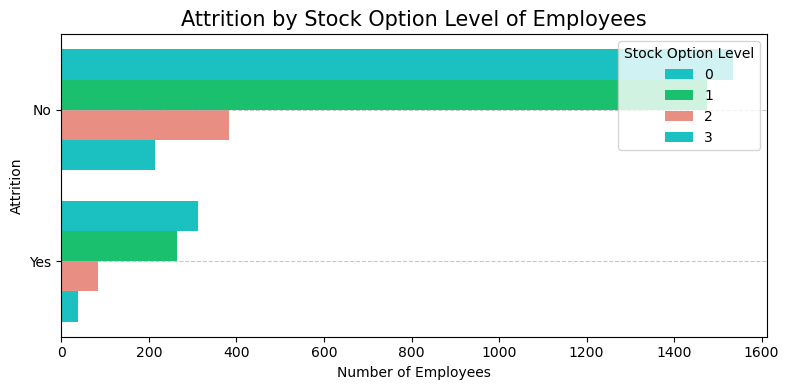

In [76]:
# Tính số lượng nhân viên theo Attrition và StockOptionLevel
work_bal_cnt = master_data.groupby(['Attrition', 'StockOptionLevel']).size().reset_index(name='count')

# Vẽ biểu đồ cột số lượng nhân viên theo Attrition và StockOptionLevel
plt.figure(figsize=(8, 4))
sns.barplot(x='count', y='Attrition', hue='StockOptionLevel', data=work_bal_cnt, palette=["#00dbdb", "#00db6e", "#fa8072"])

# Thiết lập tiêu đề và nhãn cho biểu đồ
plt.title("Attrition by Stock Option Level of Employees", fontsize=15)
plt.ylabel("Attrition")
plt.xlabel("Number of Employees")

# Thêm chú thích (legend)
plt.legend(title="Stock Option Level", loc="upper right")

# Hiển thị lưới biểu đồ
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [77]:
master_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition_Binary
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,6.533156,3.0,4.0,2.0,3,3,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,6.960598,3.0,2.0,4.0,2,4,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,6.489329,2.0,2.0,1.0,3,3,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,6.467612,4.0,4.0,3.0,2,3,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,7.505774,4.0,1.0,3.0,3,3,0


In [78]:
master_data = master_data.drop(columns=['Attrition'])
master_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition_Binary
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,6.533156,3.0,4.0,2.0,3,3,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,6.960598,3.0,2.0,4.0,2,4,1
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,6.489329,2.0,2.0,1.0,3,3,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,6.467612,4.0,4.0,3.0,2,3,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,7.505774,4.0,1.0,3.0,3,3,0


In [79]:
# Đổi tên cột Attrition_Binary thành Attrition
master_data.rename(columns={'Attrition_Binary': 'Attrition'}, inplace=True)
master_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,6.533156,3.0,4.0,2.0,3,3,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,6.960598,3.0,2.0,4.0,2,4,1
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,6.489329,2.0,2.0,1.0,3,3,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,6.467612,4.0,4.0,3.0,2,3,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,7.505774,4.0,1.0,3.0,3,3,0


In [80]:
for column in master_data.columns:
    if master_data[column].dtype == np.number:
        continue
    master_data[column] = LabelEncoder().fit_transform(master_data[column])

C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\116584483.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if master_data[column].dtype == np.number:
C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\116584483.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if master_data[column].dtype == np.number:
C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\116584483.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if master_data[column].dtype == np.number:
C:\Users\Admin\AppData\Local\Temp\ipykernel_3808\116584483.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if 

In [81]:
master_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,33,2,2,5,1,1,0,0,0,1,1166,1.0,0,0,1.0,6,1,0,0,6.533156,3.0,4.0,2.0,2,0,0
1,13,1,1,9,0,1,0,0,6,2,505,0.0,12,1,6.0,3,5,1,4,6.960598,3.0,2.0,4.0,1,1,1
2,14,1,1,16,3,4,1,3,7,1,1318,1.0,4,3,5.0,2,5,0,3,6.489329,2.0,2.0,1.0,2,0,0
3,20,0,1,1,4,1,1,2,1,1,984,3.0,0,3,13.0,5,8,7,5,6.467612,4.0,4.0,3.0,1,0,0
4,14,2,1,9,0,3,1,0,7,2,145,4.0,1,2,9.0,2,6,0,4,7.505774,4.0,1.0,3.0,2,0,0


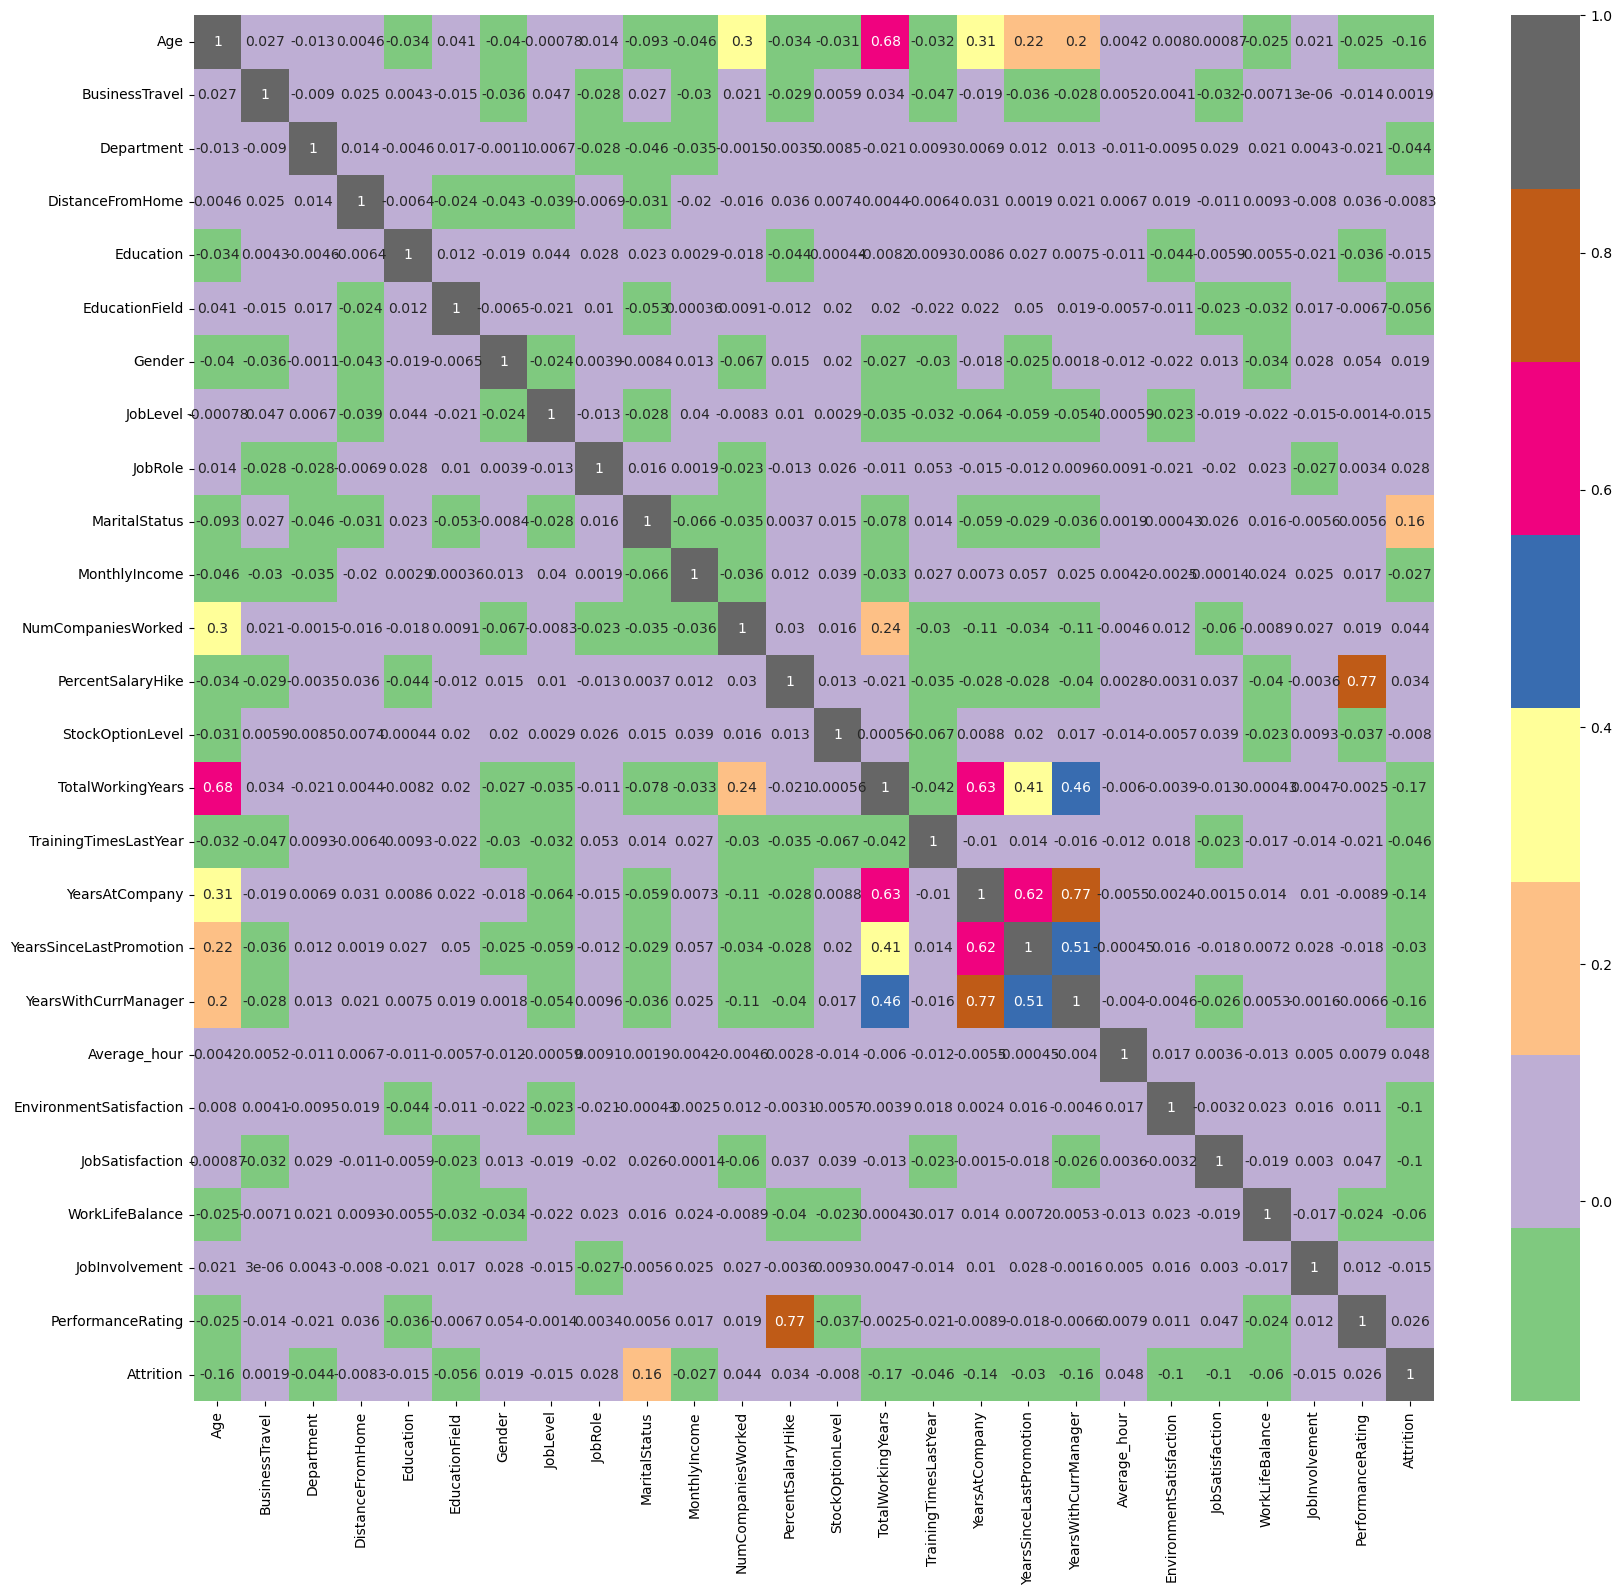

In [82]:
plt.figure(figsize=(20,18))
sns.heatmap(master_data.corr(), annot = True, cmap="Accent");

In [83]:
df_X = master_data.drop(columns=['Attrition'])
df_X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,33,2,2,5,1,1,0,0,0,1,1166,1.0,0,0,1.0,6,1,0,0,6.533156,3.0,4.0,2.0,2,0
1,13,1,1,9,0,1,0,0,6,2,505,0.0,12,1,6.0,3,5,1,4,6.960598,3.0,2.0,4.0,1,1
2,14,1,1,16,3,4,1,3,7,1,1318,1.0,4,3,5.0,2,5,0,3,6.489329,2.0,2.0,1.0,2,0
3,20,0,1,1,4,1,1,2,1,1,984,3.0,0,3,13.0,5,8,7,5,6.467612,4.0,4.0,3.0,1,0
4,14,2,1,9,0,3,1,0,7,2,145,4.0,1,2,9.0,2,6,0,4,7.505774,4.0,1.0,3.0,2,0


In [84]:
df_y = master_data['Attrition']
df_y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [85]:
X = df_X #X là input
y = df_y #y là output
#transform dataset nhớ thêm thư viện này vào import imblearn from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#Summarize the new class distribution
counter = Counter(y)
#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
logres = LogisticRegression()

# Định nghĩa các tham số mà bạn muốn thử nghiệm cho Logistic Regression
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']},
    # Có thể thêm các tham số khác nếu bạn muốn
]

# Tìm kiếm các siêu tham số tốt nhất
grid_search = GridSearchCV(logres, param_grid[0], cv=5)
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất và độ chính xác
print(f"{logres.__class__.__name__}:")
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression:
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best R2 score: 0.694520510881868


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Tạo đối tượng DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Định nghĩa các tham số mà bạn muốn thử nghiệm cho Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],      # Hàm tiêu chí
    'max_depth': [3, 5, 10, None],         # Độ sâu tối đa của cây
    'min_samples_split': [2, 10, 20],      # Số lượng mẫu tối thiểu để chia một node
    'min_samples_leaf': [1, 5, 10]         # Số lượng mẫu tối thiểu trong một node lá
}

# Tìm kiếm các siêu tham số tốt nhất
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất và độ chính xác
print(f"{dtree.__class__.__name__}:")
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

DecisionTreeClassifier:
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R2 score: 0.9713940425173725


In [86]:
# Fit mô hình Logistic Regression
logres = LogisticRegression()
logres.fit(X_train, y_train)
y_pre_log = logres.predict(X_test)
# Dự đoán xác suất của các lớp
y_pre_proba_log = logres.predict_proba(X_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
#tính AUC
# Trích xuất xác suất của lớp dương (lớp 1)
y_pre_proba_log = y_pre_proba_log[:, 1]

# Tính độ AUC
roc_auc = roc_auc_score(y_test, y_pre_proba_log)

# In kết quả
print(f'AUC: {roc_auc}')

AUC: 0.7568011762532332


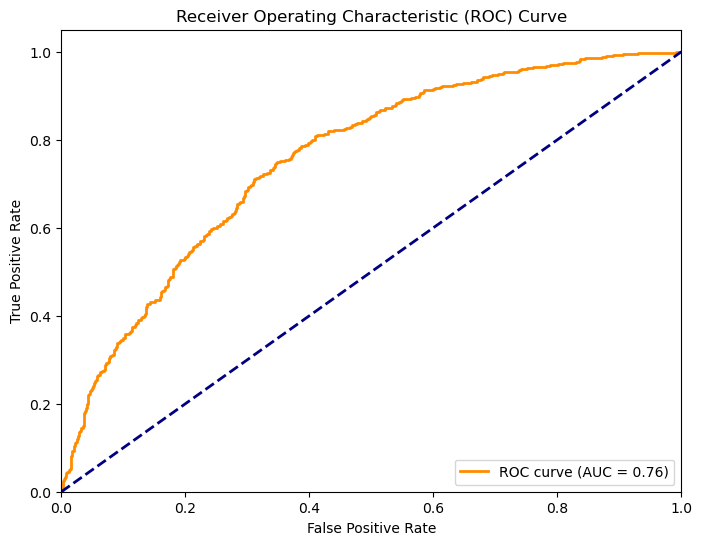

In [88]:
# Tính các giá trị của đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pre_proba_log)

# Tính AUC
roc_auc = roc_auc_score(y_test, y_pre_proba_log)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Vẽ đường chéo tham chiếu (đường cong không phân biệt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
result = X_test
result['predict_log'] = y_pre_log
result.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Average_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,predict_log
308,17,2,1,4,3,3,1,2,3,1,25,1.0,5,0,3.0,6,3,0,2,8.496301,1.0,4.0,2.0,1,0,0
381,21,2,1,0,2,4,0,2,1,1,901,8.0,3,1,13.0,3,5,0,4,7.951391,4.0,4.0,3.0,1,0,0
5809,16,1,1,4,2,3,1,1,6,0,1200,0.0,9,1,3.0,3,2,1,0,17.231083,4.0,3.0,2.0,2,1,0
2312,9,1,1,6,2,1,1,0,6,2,287,2.0,9,0,6.0,3,4,1,2,14.732613,4.0,4.0,2.0,2,1,1
251,11,1,2,1,3,1,1,3,0,0,862,1.0,7,3,10.0,3,10,2,8,7.822338,2.0,4.0,3.0,1,0,0


In [90]:
#confusion matrix
print(confusion_matrix(y_pre_log, y_test))
print(classification_report(y_pre_log, y_test))

[[507 207]
 [229 499]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       714
           1       0.71      0.69      0.70       728

    accuracy                           0.70      1442
   macro avg       0.70      0.70      0.70      1442
weighted avg       0.70      0.70      0.70      1442



Accuracy_logres:  0.6976421636615812


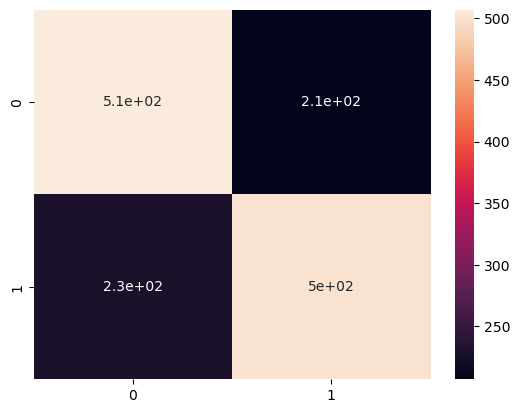

In [91]:
sns.heatmap(confusion_matrix(y_pre_log,y_test),annot=True)
# logistic accuracy
print ('Accuracy_logres: ', accuracy_score(y_pre_log, y_test))

In [143]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:04:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9937586685159501


In [142]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.98440208 0.98960139 0.97746967 0.99133449 0.98440208 0.98613518
 0.98440208 0.96880416 0.98090278 0.98263889]


In [136]:
# Fit mô hình Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Dự đoán nhãn lớp cho các mẫu trong tập test
y_pre_dt = dt.predict(X_test)

# Dự đoán xác suất của các lớp
y_pre_proba_dt = dt.predict_proba(X_test)

# Trích xuất xác suất của lớp dương (lớp 1)
y_pre_proba_dt = y_pre_proba_dt[:, 1]

# Tính độ chính xác và AUC
accuracy = accuracy_score(y_test, y_pre_dt)
auc = roc_auc_score(y_test, y_pre_proba_dt)

# In kết quả
print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

# Ma trận nhầm lẫn
print(confusion_matrix(y_test, y_pre_dt))

Accuracy: 0.9743411927877947
AUC: 0.9744888533070574
[[712  24]
 [ 13 693]]


In [137]:
print(classification_report(y_pre_dt, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       725
           1       0.98      0.97      0.97       717

    accuracy                           0.97      1442
   macro avg       0.97      0.97      0.97      1442
weighted avg       0.97      0.97      0.97      1442



Accuracy_dt:  0.9743411927877947


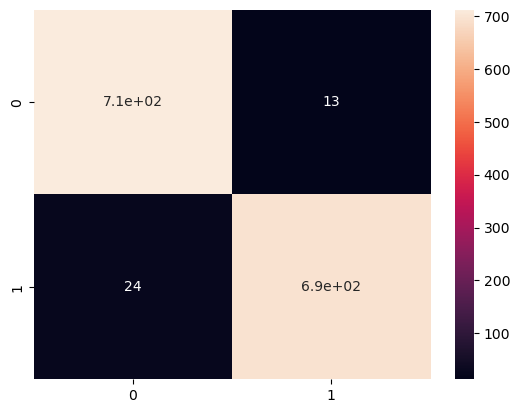

In [138]:
sns.heatmap(confusion_matrix(y_pre_dt,y_test),annot=True)
# logistic accuracy
print ('Accuracy_dt: ', accuracy_score(y_pre_dt, y_test))

Logistic Regression test data accuracy: 0.694868238557559
Decision Tree test data accuracy: 0.9743411927877947


<Axes: >

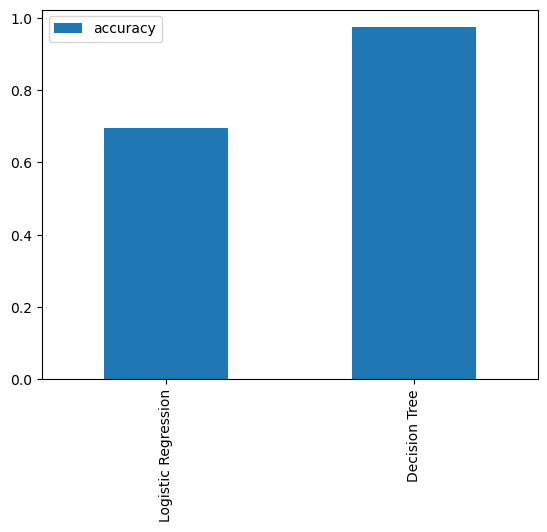

In [139]:
#model scores
model_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pre_log),
    'Decision Tree': accuracy_score(y_test, y_pre_dt)
}
model_scores

# In kết quả so sánh
for model, score in model_scores.items():
    print(f"{model} test data accuracy: {score}")

#Model Comparison
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

#Visualize the accuracy of each model
model_compare.T.plot(kind='bar') # (T is here for transpose)
#we can see that Random Forest has 1% better accuracy than Logistic regression 
#but Decision tree is an overfitted model so we will select Logistic regression.

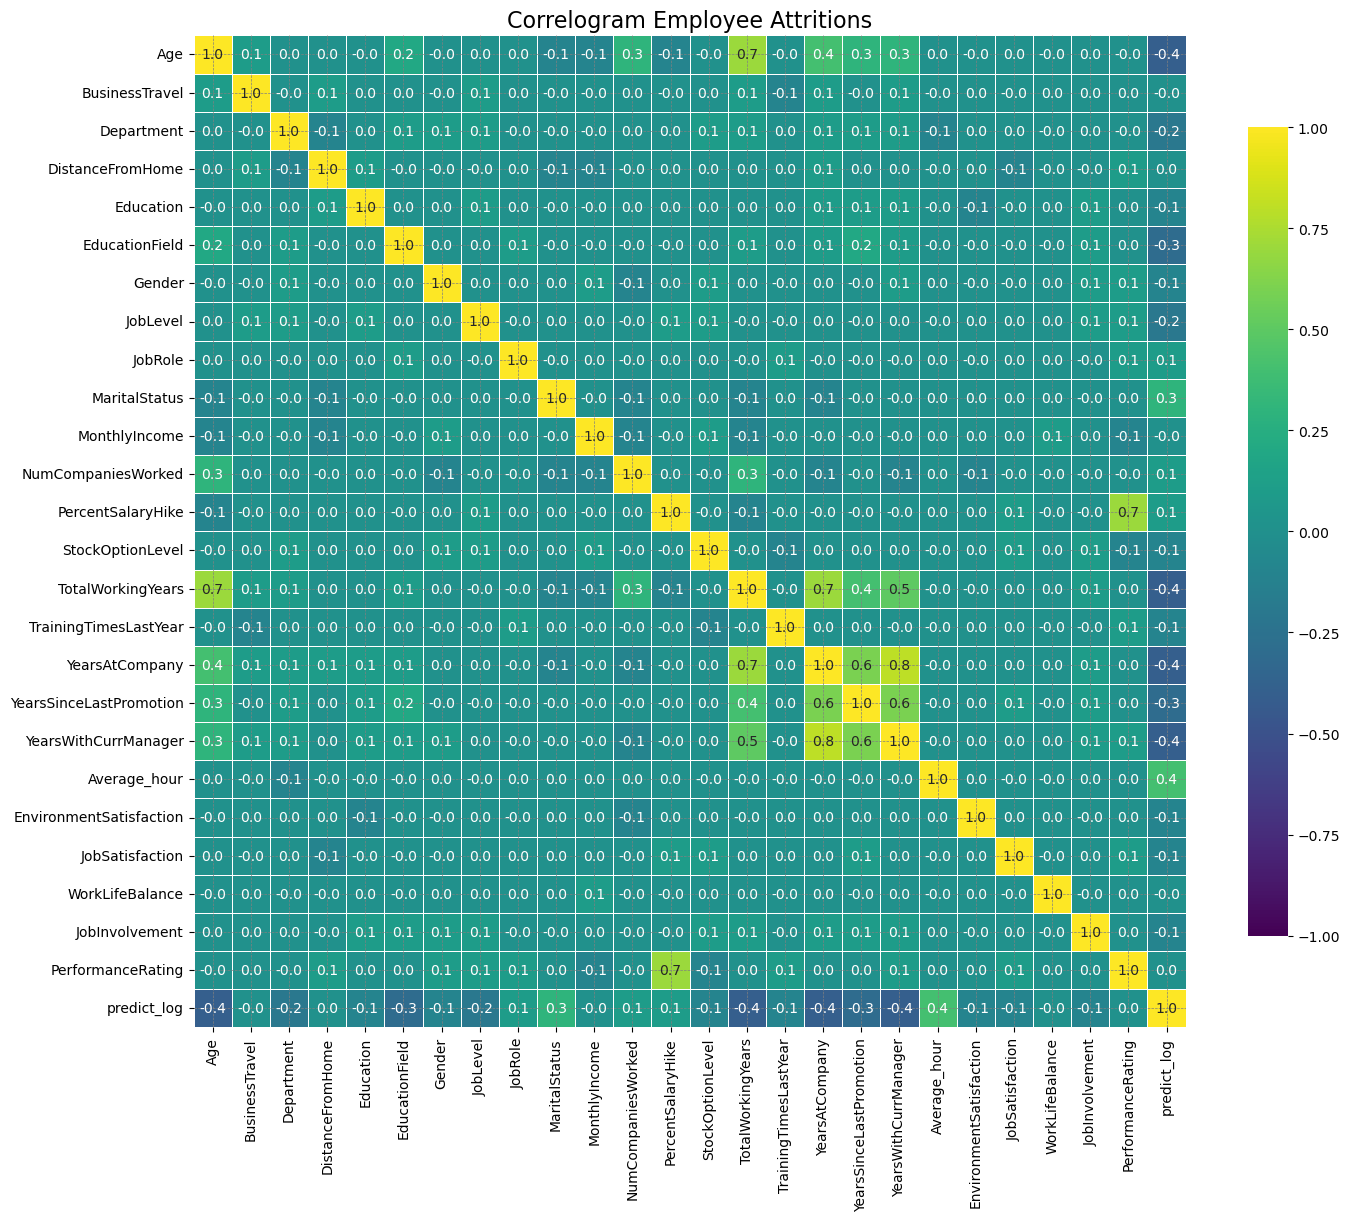

In [149]:
# Chọn các cột số
nums = result.select_dtypes(include=[np.number])

# Tính ma trận tương quan
corr = nums.corr().round(1)

# Vẽ biểu đồ tương quan (correlation plot)
plt.figure(figsize=(16, 14))  # Thiết lập kích thước hình ảnh
sns.heatmap(corr, 
            annot=True, fmt=".1f", 
            cmap='viridis',
            vmin=-1, vmax=1, 
            square=True, linewidths=0.5, 
            cbar_kws={"shrink": .75})

# Thêm lưới
plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5)

# Thiết lập tiêu đề
plt.title("Correlogram Employee Attritions", fontsize=16)

# Hiển thị biểu đồ
plt.show()